# 简介

selenium是一个自动化测试网页的python包，可以用来模拟用户真实操作网页的场景。其可以让python代码调用浏览器。并获取到浏览器中加载的各种资源。

selenium的使用场景是：
- 网站的数据是经过加密的，浏览器是可以正常展示，用爬虫拿到网页的数据却不是想要的数据
- 通过验证码

但是并不是学了seleniunm就不必去学习逆向，selenium太慢了，还有各种环境问题，网络问题的因素导致相同的代码一台机器上能跑放在另一台机器上不能跑。

# 安装和环境配置

安装：pip install selenium

下载对应浏览器版本的驱动，selenium 是通过操作机器上的浏览器驱动进行控制浏览器的。

不同浏览器的驱动不同，驱动要和自己机器上安装的浏览器版本一致，如果找不到一致的就找和浏览器版本相近的驱动版本。

google浏览器驱动下载地址：http://chromedriver.storage.googleapis.com/index.html

查看自己浏览器的版本：
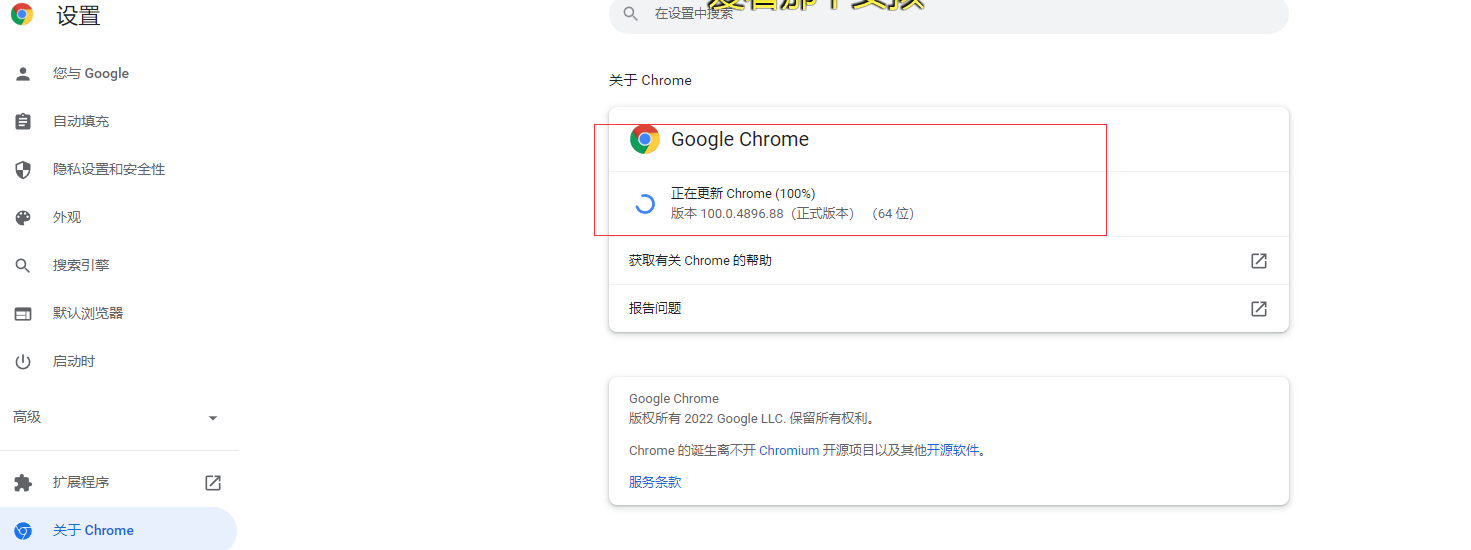
**注意**：谷歌浏览器是默认自动更新的，所以你的selenium代码写好，一段时间能跑，过一段时间就不能跑了，去看驱动是否匹配



当前浏览器版本：
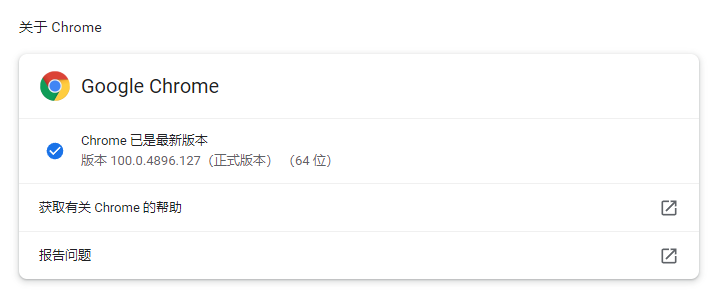

下载驱动，没有找到一样的，找最近的
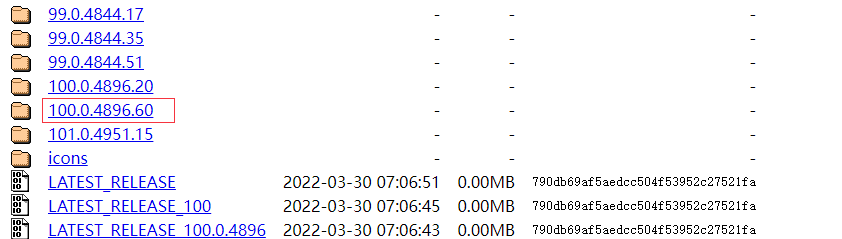

windows只有32，下载即可
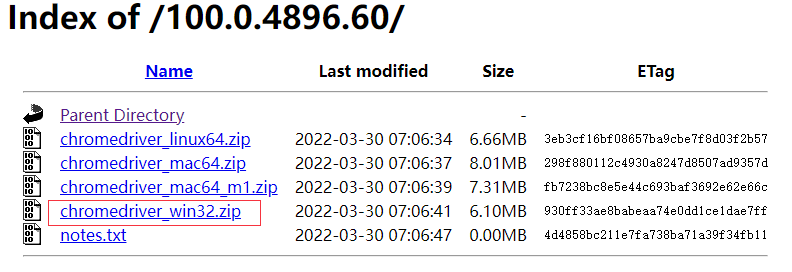

下载好的驱动解压之后放到和python解释器同级目录下。

如果不知道当前用的python解释器在你电脑上的地址，打开你的pycharm运行一个最简单的python程序去即可知道。

# 简单使用

selenuim拿到的网页源码是一个完成体，是浏览器经过渲染之后的结果，对于标签的查找可以参考`Elements`中的数据，xpath也可以不用自己写直接右键复制xpath。

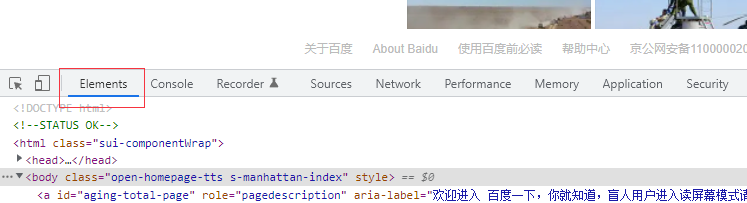

## 打开一个百度，并输入搜索

In [ ]:
# 1. selenium的包都很长
# 导入驱动的py包
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By  # 通过什么方式拿到标签，辅助find_element， find_elements函数
from selenium.webdriver.common.keys import Keys  # 键盘上的键都在这里

web = Chrome()
# 打开url
web.get("https://www.baidu.com/")

web.maximize_window()  # 设置为最大窗口

# 网站的标题
print(web.title)

# 第一个参数是爬取规则，其用的xpath不是完整的xpath，有些地方和原生的不一致。 第二个参数是匹配规则。
input_el = web.find_element(By.XPATH, '//*[@id="kw"]')  # 拿到一个匹配的标签
# 给input 标签中写入数据，然后点击回车
input_el.send_keys("大宝贝", Keys.ENTER)  # 在输入字符后，自动发送回车的事件


浏览器很清楚的知道你是用selenium拉起的，网站上也很容易知道，有些网站会禁止selenium的访问，有些会加入一些验证。

如百度

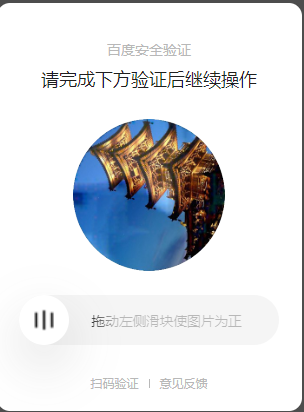

## 某招聘网站的爬取

```python
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

"""
在招聘网站首页，输入关键字，拿到所有职位的详情信息
"""

url = "https://www.zhipin.com/xian/"
web = Chrome()
web.get(url)

# 当你使用find_xxxx如果找不到东西. 它会报错. 有可能不是下面代码的问题. 而是浏览器没有加载完成.
input_el = web.find_element(By.XPATH, '//*[@id="wrap"]/div[3]/div/div[1]/div[1]/form/div[2]/p/input')
input_el.send_keys("python", Keys.ENTER)  # 输入回车

time.sleep(1)  # 下面find没有找到内容，是因为浏览器没有加载完成
# 获取职位列表
li_list = web.find_elements(By.XPATH, '//div[@class="job-list"]/ul/li')
for li in li_list:
    # print(li.text)
    a = li.find_element(By.XPATH, './/span[@class="job-name"]/a')  # 只能拿到节点，取值和取属性得用方法，和xpath不一致
    name = a.get_property('title')
    position = li.find_element(By.Px, './/span[@class="job-area"]').text
    print(name, position)
for li in li_list:
    # selenium用的不是一个标准的xpath语法规则
    # 最后一项不可以是@xxx, text()
    a = li.find_element(By.XPATH, ".//span[@class='job-name']/a")  # 只能拿到节点，取值和取属性得用方法，和xpath不一致
    name = a.text  # 获取该标签的文本，    节点.text
    href = a.get_property("href")  # 获取标签的属性
    price = li.find_element(By.XPATH, ".//span[@class='red']")
    print(name, href, price.text)

    a.click()  # 点击，跳转到职位详情页
    time.sleep(5)
    # 如果弹出了新窗口. 那么你需要把程序调整到新窗口里. 才能开始采集数据. 否则会报错.
    web.switch_to.window(web.window_handles[-1])  # 进入新窗口，-1是最新的窗口
    # 从新窗口中获取数据
    details = web.find_element(By.XPATH, "//div[@class='job-detail']").text
    print(details)
    print("================")
    # 关闭当前窗口
    web.close()  # 关闭了新窗口之后. selenium需要手动调整窗口到原来的窗口上
    web.switch_to.window(web.window_handles[0])

```

## 切换到iframe标签中，拿数据

```python
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By

web = Chrome()
web.get("http://www.wbdy.tv/play/69328_1_1.html")

iframe = web.find_element(By.XPATH, "//iframe[@id='mplay']")
web.switch_to.frame(iframe)  # 切入到iframe中
# 然后才可以提取iframe中的内容
video = web.find_element(By.XPATH, "//video")
src = video.get_property("src")
web.switch_to.parent_frame()  # 切换到上层frame
print(src)

```

## 无头浏览器

无头浏览器指的意思是，在执行时不打开浏览器显示，在后台默默执行，一般是先使用有头浏览器写完调试完，再使用无头浏览器执行，加快一丢丢速度。

```python
# 先搞有界面的
# 再考虑如何没有界面
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select  # 专门用来处理下拉框的
import time

# 参数设置，固定写法
opt = Options()
opt.add_argument("--headless")  # 无头
opt.add_argument('--disable-gpu')  # 禁用GPU
opt.add_argument("--window-size=4000,1600")  # 设置窗口大小， 虽然不显示浏览器，但是必须设置浏览器的大小，防止页面元素的堆叠，从而有意想不到的结果

web = Chrome(options=opt)   # 创建浏览器，传递opt参数设置
web.get("https://www.endata.com.cn/BoxOffice/BO/Year/index.html")

# 先拿数据. 然后切换年份选项
table = web.find_element(By.ID, "TableList")
print(table.text)

# 切换选项 以下内容只针对select标签
# 1.找到选择框
sel = web.find_element(By.ID, "OptionDate")  # div, span a
sel = Select(sel)

for option in sel.options:  # 拿所有的选项
    o = option.text  # 选项在页面显示的文本
    sel.select_by_visible_text(o)  # 通过文字进行选择
    #等待新的数据加载.
    time.sleep(2)
    # 先拿数据. 然后切换年份选项
    table = web.find_element(By.ID, "TableList")
    print(table.text)

```

# 验证码通过

## 超级鹰过简单的图片数字识别

网址：https://www.chaojiying.com/

里面有提供各种语言的事例，根据不同语言来获取。

步骤：
1. 获取页面中验证码的照片
2. 将验证码的照片以bytes数据传递到超级鹰
3. 拿到超级鹰识别到的数据，填入
3. 点击登录

```python
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
import requests
from hashlib import md5

# 这个class是固定写法，从超级鹰网站上拿来的事例
class Chaojiying_Client(object):

    def __init__(self, username, password, soft_id):
        self.username = username
        password =  password.encode('utf8')
        self.password = md5(password).hexdigest()
        self.soft_id = soft_id
        self.base_params = {
            'user': self.username,
            'pass2': self.password,
            'softid': self.soft_id,
        }
        self.headers = {
            'Connection': 'Keep-Alive',
            'User-Agent': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0)',
        }

    def PostPic(self, im, codetype):
        """
        im: 图片字节
        codetype: 题目类型 参考 http://www.chaojiying.com/price.html
        """
        params = {
            'codetype': codetype,
        }
        params.update(self.base_params)
        files = {'userfile': ('ccc.jpg', im)}
        r = requests.post('http://upload.chaojiying.net/Upload/Processing.php', data=params, files=files, headers=self.headers)
        return r.json()

    def ReportError(self, im_id):
        """
        im_id:报错题目的图片ID
        """
        params = {
            'id': im_id,
        }
        params.update(self.base_params)
        r = requests.post('http://upload.chaojiying.net/Upload/ReportError.php', data=params, headers=self.headers)
        return r.json()

web = Chrome()
web.get("https://www.chaojiying.com/user/login/")

web.find_element(By.XPATH, "/html/body/div[3]/div/div[3]/div[1]/form/p[1]/input").send_keys("账号")  # 账号输入
 
web.find_element(By.XPATH, "/html/body/div[3]/div/div[3]/div[1]/form/p[2]/input").send_keys("密码")  # 密码输入

img = web.find_element(By.XPATH, '/html/body/div[3]/div/div[3]/div[1]/form/div/img')

# screenshot 截屏，对img标签进行截屏，拿到图片数据。
bs = img.screenshot_as_png  # 返回的是字节
# img.screenshot('filename.png')  # 将验证码图片保存为图片文件
# 交给超级鹰来进行识别
chaojiying = Chaojiying_Client('超级鹰账号', '超级鹰密码', 'code，从超级鹰网站获取')
dic = chaojiying.PostPic(bs, 1004)  # 把图片的字节传递进去即可

code = dic['pic_str']  # 获取识别结果

web.find_element(By.XPATH, "/html/body/div[3]/div/div[3]/div[1]/form/p[3]/input").send_keys(code)

web.find_element(By.XPATH, "/html/body/div[3]/div/div[3]/div[1]/form/p[4]/input").click()  # 登录

```

In [1]:
https://www.anrenzx.top/list.html?id=146929  shishi

SyntaxError: invalid syntax (<ipython-input-1-c91de23fa15c>, line 1)

## 图鉴点选验证码的识别

地址：http://www.ttshitu.com/

官网案例
```python
import base64
import json
import requests

# typeid的取值
# 一、图片文字类型(默认 3 数英混合)：
# 1 : 纯数字
# 1001：纯数字2
# 2 : 纯英文
# 1002：纯英文2
# 3 : 数英混合
# 1003：数英混合2
#  4 : 闪动GIF
# 7 : 无感学习(独家)
# 11 : 计算题
# 1005:  快速计算题
# 16 : 汉字
# 32 : 通用文字识别(证件、单据)
# 66:  问答题
# 49 :recaptcha图片识别
# 二、图片旋转角度类型：
# 29 :  旋转类型
#
# 三、图片坐标点选类型：
# 19 :  1个坐标
# 20 :  3个坐标
# 21 :  3 ~ 5个坐标
# 22 :  5 ~ 8个坐标
# 27 :  1 ~ 4个坐标
# 48 : 轨迹类型
#
# 四、缺口识别
# 18 : 缺口识别（需要2张图 一张目标图一张缺口图）
# 33 : 单缺口识别（返回X轴坐标 只需要1张图）
# 五、拼图识别
# 53：拼图识别
def base64_api(uname, pwd, img, typeid):
    # 官方的案例. 是把一张图片. 处理成了base64
    with open(img, 'rb') as f:
        base64_data = base64.b64encode(f.read())
        b64 = base64_data.decode()
        print(b64)
    #
    data = {"username": uname, "password": pwd, "typeid": typeid, "image": b64}
    result = json.loads(requests.post("http://api.ttshitu.com/predict", json=data).text)
    if result['success']:
        return result["data"]["result"]
    else:
        return result["message"]


if __name__ == "__main__":
    result = base64_api(uname='图鉴账号', pwd='图鉴密码', img="a.jpg", typeid=1)
    print(result)
```

使用selenium登录b站

其登录是点选方式的验证码机制，其验证码机制经常变化，有时是点选有时是其他的。

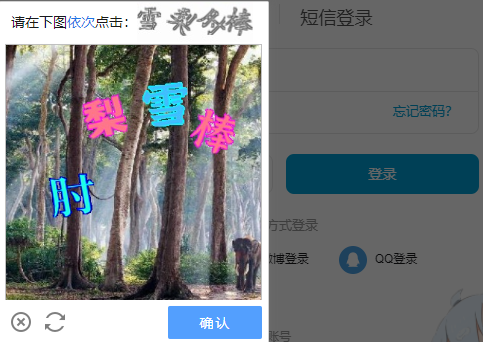

步骤：
1. 使用selenium将验证机制的图片保存到本地
2. 发送图片到图鉴
3. 图鉴会返回点击的坐标顺序，坐标值是相对于图片左上角的偏移量
4. 利用selenium的事件链依次点击
5. 通过验证，登录

**selenium的三种等待机制**
在selenium中有三种等待方案

1. time.sleep()

    这个没啥说的. 就是干等.  不论元素是否加载出来. 都要等

2. web.implicitly_wait(10)

    这个比上面那个人性化很多. 如果元素加载出来了. 就继续. 如果没加载出来. 此时会等待一段时间. 

    注意, 此设置是全局设置.  一次设置后. 后面的加载过程都按照这个来. (爬虫用的会多一些)

3. WebDriverWait

    这个比较狠. 单独等一个xxxx元素. 如果出现了. 就过, 如果不出现. 超时后, 直接报错. 
```python
    ele = WebDriverWait(web, 10, 0.5).until(
            EC.presence_of_element_located((By.XPATH, "/html/body/div[5]/div[2]/div[1]/div/div"))
        )
```

web.implicitly_wait(10)是find_xxx()方法进行等待，如果10s内浏览器完成了加载，继续往下走，超过10s了还没加载完成，find_xxx()方法会报错。

```python
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time
import base64
import requests
import json

def base64_api(uname, pwd, img, typeid):
    # 官方的案例. 是把一张图片. 处理成了base64
    with open(img, 'rb') as f:
        base64_data = base64.b64encode(f.read())
        b64 = base64_data.decode()

    data = {"username": uname, "password": pwd, "typeid": typeid, "image": b64}
    result = json.loads(requests.post("http://api.ttshitu.com/predict", json=data).text)
    if result['success']:
        return result["data"]["result"]
    else:
        return result["message"]

web = Chrome()
web.implicitly_wait(10)  # 软等待
web.get('https://www.bilibili.com/')

# 点击登录
web.find_element(By.XPATH, '//*[@class="header-login-entry"]/span').click()
# 账号密码
web.find_element(By.XPATH, '//*[@class="bili-mini-account"]/input').send_keys("12345789")
web.find_element(By.XPATH, '//*[@class="bili-mini-password"]/div[1]/input').send_keys("123456")

time.sleep(3)  # 这里只能硬等待
web.find_element(By.XPATH, '//*[@class="universal-btn login-btn"]').click()

tu = web.find_element(By.XPATH, '//*[@class="geetest_widget geetest_medium_fontsize"]')
tu.screenshot("tu.png")  # 把图片存储在文件中
# tu.screenshot_as_png  # 直接拿到字节
result = base64_api("图鉴账号", "图鉴密码", "tu.png", 21)  # 21是识别种类
print(result)

# 220,59|166,86|182,212
rs = result.split('|')
for r in rs:
    x, y = r.split(',')
    x = int(x)
    y = int(y)
    # 找到截图的那个位置的左上角, 横向移动xxx, 纵向移动xxx, 点击
    # 事件链, 动作链  一系列的操作, 先移动到tu这个标签的左上角，在以此为基础进行偏移,再点击，perform是提交事件一定要写。
    ActionChains(web).move_to_element_with_offset(tu, xoffset=x, yoffset=y).click().perform()  # 固定写法
    time.sleep(1)


time.sleep(1)
# 登录
web.find_element(By.XPATH, "//*[@class='geetest_commit_tip']").click()

```

## requests通过验证码

requests通过验证码，需要拿到验证码图片的数据，此时就需要去网页中翻翻找找，找到图片的数据。

图片数据在网络中一般都是用base64处理之后在网络上传输的。


**通过图鉴的验证码**

分析图鉴验证码
- 进入登录页面
- 图鉴会返回一个登录框和cookie信息，cookie信息来识别是谁提交的验证码结果，所以需要保持一个会话
- 图鉴识别验证码，查看登录的请求内容，模拟登录。

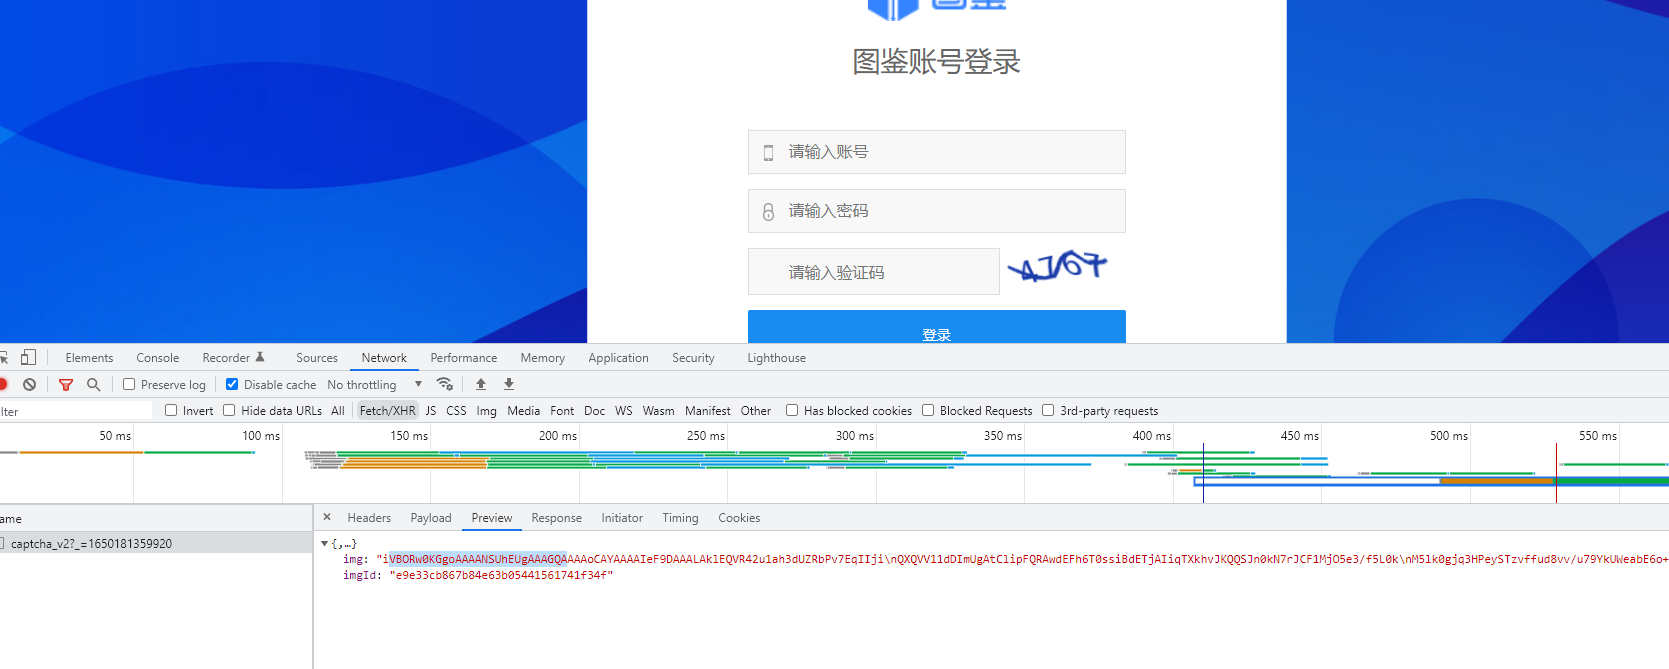

图鉴的登录会返回两个信息，返回的数据是json内容
- img： 仔细看看和base64编码之后的结果有些像，其就是验证码图片的数据
- imgId: 是该验证码图片的id，来唯一标识验证码

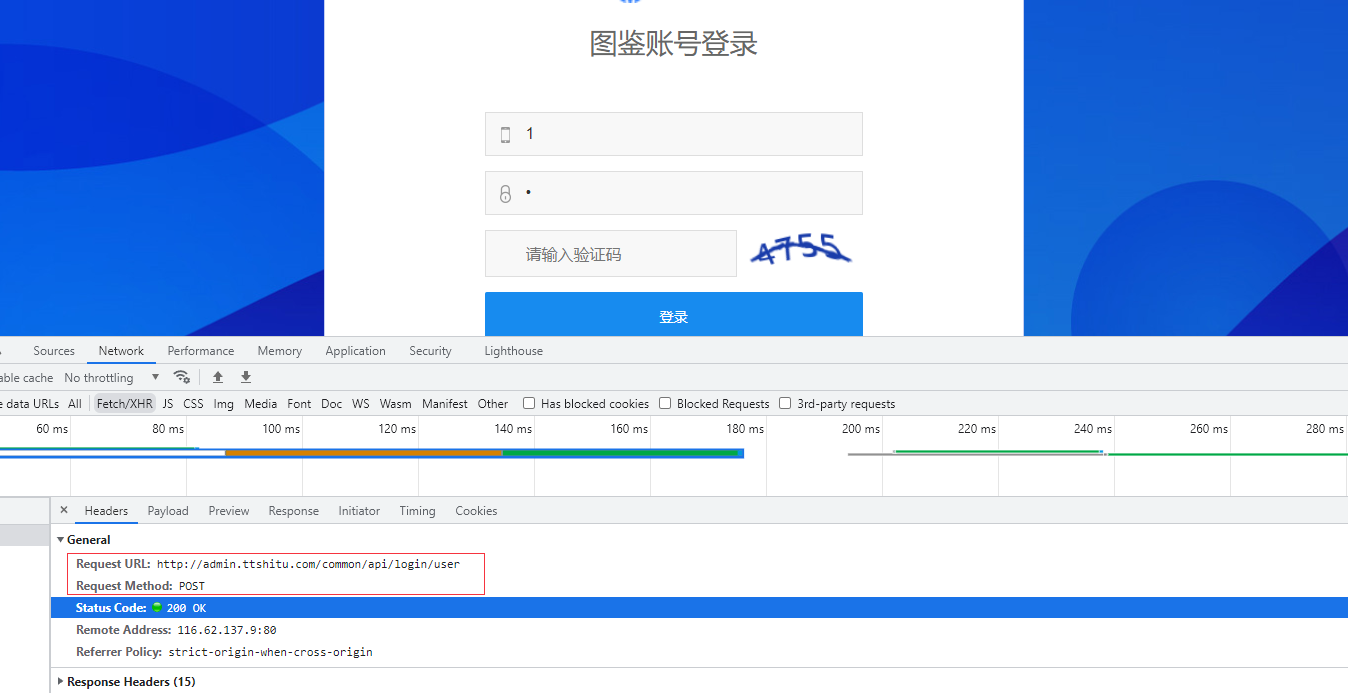

点击登录发送的url和请求方式，请求方式是post，需要看Payload中需要给什么数据

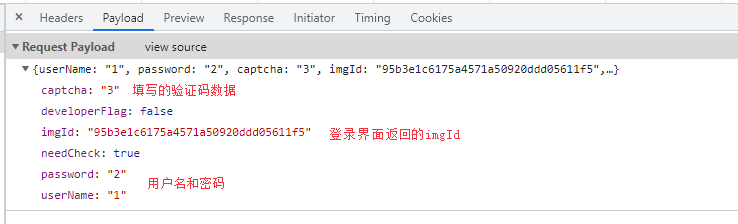

向后端传递参数的三种方式：

1. get请求的参数，参数会拼接到url中
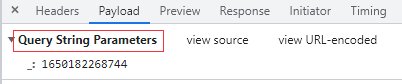
2. post请求参数1， 键值对的形式放到post请求中
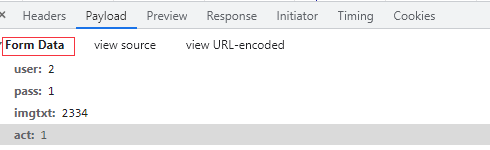
3. post请求参数2，json数据
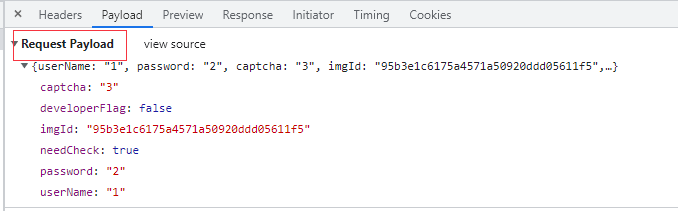

requests中传递这三个参数的方式, {}都值python的字典类型的数据
```python
requests.get(url, params={})  # 1
requests.post(url, data={})  # 2
resp = requests.post(url, data=json.dumps({}), headers={"Content-Type": "application/json; charset=UTF-8"})  # 3
resp = requests.post(login_url, json=data) # 3
```

登录代码：
```python
# 用requests来完成登录过程
# 一般情况下. 在使用验证码的时候. 要保持住会话. 否则容易引起,验证码识别不成功的现象
import time

import requests
import base64
import json


def base64_api(uname, pwd, img, typeid):
    data = {"username": uname, "password": pwd, "typeid": typeid, "image": img}  # 直接把img搞进来
    result = json.loads(requests.post("http://api.ttshitu.com/predict", json=data).text)
    if result['success']:
        return result["data"]["result"]
    else:
        return result["message"]

# 使用session来保持一个会话信息
session = requests.session()
# 1.设置好头信息
session.headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36"
}

# 2. 加载一个最原始的cookie(可能需要可能不需要. 好习惯)
session.get("http://www.ttshitu.com/login.html?spm=null")

# 3. 发送请求拿到验证码数据
verify_url = "http://admin.ttshitu.com/captcha_v2?_=1650111626736"  # url屁股上总能看见_ t n  => 时间戳，用来防止浏览器缓存的，不用关心

resp = session.get(verify_url)
img = resp.json()['img']  # resp.josn() 直接将拿到的json数据，转为字典
img_id = resp.json()['imgId']

# 4. 识别验证码
verify_code = base64_api("q6035945", "q6035945", img, 1)

username = "q6035945"
password = "q6035945"

print(verify_code)
login_url = "http://admin.ttshitu.com/common/api/login/user"
data = {
    "captcha": verify_code,
    "developerFlag": False,
    "imgId": img_id,
    "needCheck": True,
    "password": password,
    "userName": username,
}
# 5. 登录
# 我们在浏览器中发现了一种全新的参数逻辑
# Request Payload
# 第一, 发送出去的是json
# 第二, 请求一定是post
# 第三, 它的请求头里一定有content-type:application/json;
# resp = session.post(login_url, data=json.dumps(data), headers={"Content-Type": "application/json; charset=UTF-8"})
resp = session.post(login_url, json=data)  # 如果给了json参数. 自动的帮你转化和处理. 以及请求头的处理
print(resp.text)

```

# selenium拿到页面的源代码，再用lxml处理

Selenium可以获取到Elements的结构代码
```python
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from lxml import etree

web = Chrome()
web.implicitly_wait(10)

def get_page_source(url):
    web.get(url)
    time.sleep(3)
    return web.page_source  # selenium中的page_source 是elements

if __name__ == '__main__':
    url = "https://search.bilibili.com/all?keyword=%E5%87%A4%E5%87%B0%E8%8A%B1%E5%BC%80%E7%9A%84%E8%B7%AF%E5%8F%A3&from_source=webtop_search&spm_id_from=333.1007&page=3&o=72"
    page_source = get_page_source(url)  # 拿到Element的源码
    tree = etree.HTML(page_source)  # xpath分析源码，获取页面数据
    txt = tree.xpath("//*[@class='video-list row']//text()")
    print(txt)
```

# 去掉selenium打开浏览器的标识
```python
option.add_experimental_option('excludeSwitches', ['enable-automation'])  # 这只是去掉了一个判断点，一些网页可能不止这么一个点来检测是否是selenium打开了网页
```

# selenium过简单的滑块验证码

滑块验证就是检测访问的是脚本还是人，会检测鼠标的滑动轨迹和速度等指标，使用的是机器学习算法，现在滑块有点难通过，因为每一次人的滑动就是对机器的一次学习，识别的准确率会越来越高。

步骤：
- 找到滑块的标签
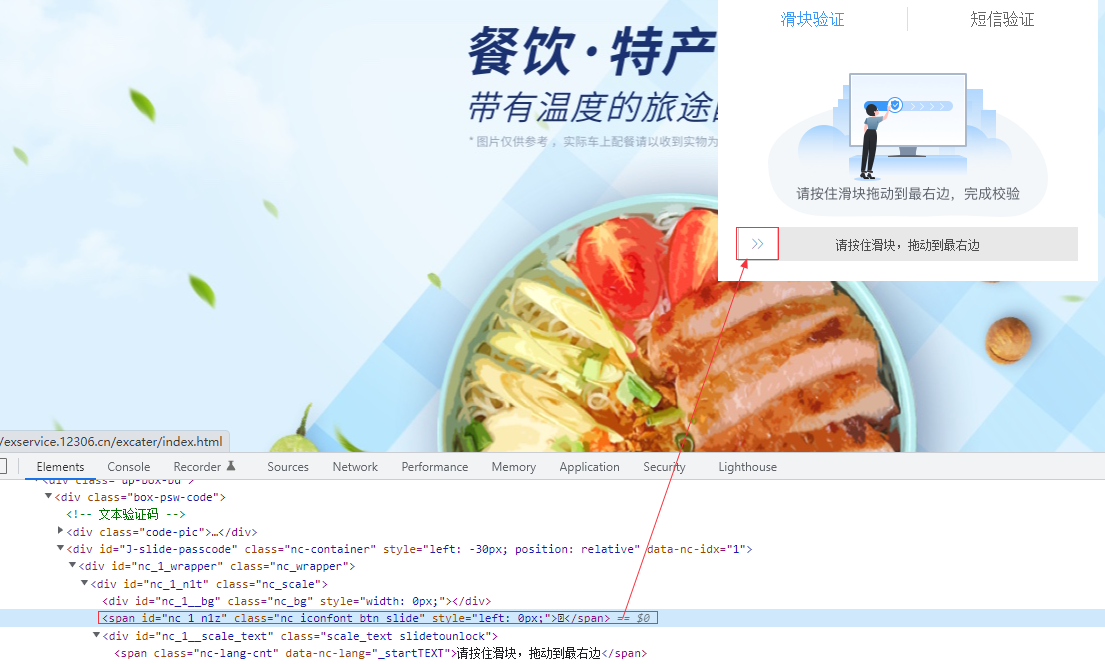
- 使用selenium的事件链，按住-拖动滑块到指定位置-放开

完整代码

```python
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options

option = Options()
# 可以去掉显示的那个"自动化工具xxxx"
option.add_experimental_option('excludeSwitches', ['enable-automation'])
# 它可以取消掉webdriver
option.add_argument('--disable-blink-features=AutomationControlled')

web = Chrome(options=option)
web.maximize_window()
web.implicitly_wait(10)

web.get("https://kyfw.12306.cn/otn/resources/login.html")

web.find_element(By.ID, "J-userName").send_keys("123456798")
time.sleep(1)
web.find_element(By.ID, "J-password").send_keys("123456798")

web.find_element(By.ID, 'J-login').click()

time.sleep(3)
# 滑块. 怎么处理. 超级粗糙的处理
btn = web.find_element(By.ID, 'nc_1_n1z')

ac = ActionChains(web)
ac.click_and_hold(btn)  # 按住
ac.move_by_offset(xoffset=400, yoffset=0)  # 拖拽, 拖动距离需要目测
ac.release()  # 松手
ac.perform()
time.sleep(3)
```

# cookie的一些处理

拿到cookie的一些方案：
- 从网站上直接拷贝过来使用
- 利用selenium登录后，拿到cookie。适用于cookie在登录之后就会给的场景
- 逆向

## 使用selenium登录，并拿到cookie给requests使用

`cookies = web.get_cookies()`  会拿到浏览器缓存到的cookie(服务器返回的cookie和js执行加载的cookie)，其内容是
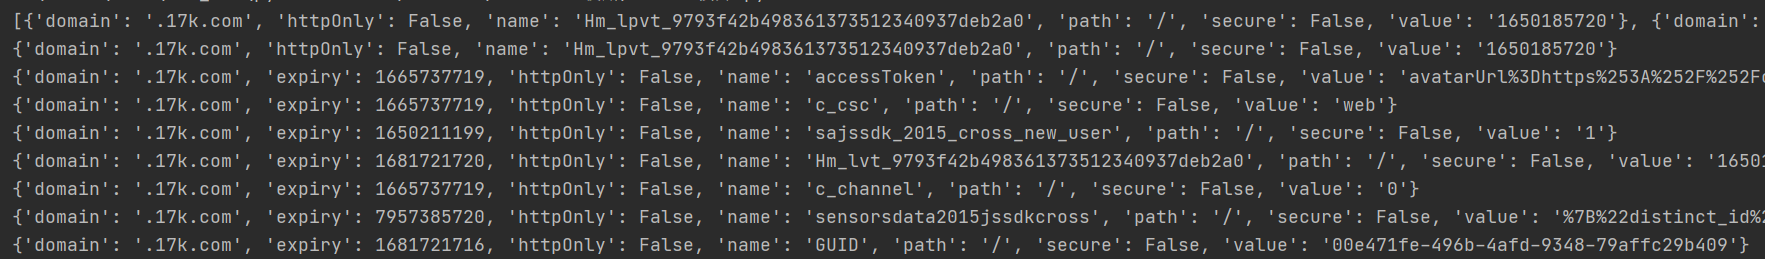

其实就是下面的数据

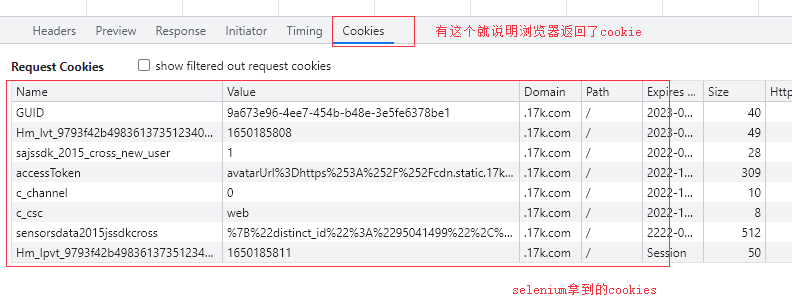

cookies在浏览器中的使用：

在cookie中是`key=value; key=value;...`的格式，再对比我们`web.get_cookies()`拿到的cookies来看，其中name就是key，value就是value。

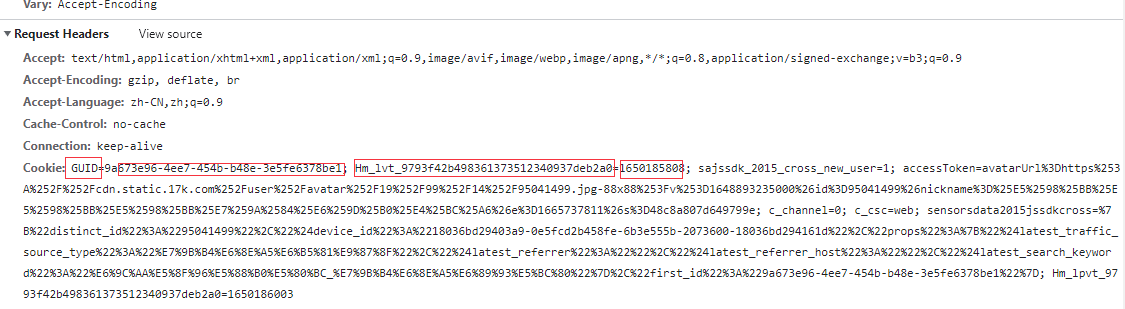

完整代码：
```python
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
import time
import requests

url = "https://www.17k.com/"

web = Chrome()
web.implicitly_wait(5)
web.get(url)
web.maximize_window()

# 进入登录
web.find_element(By.XPATH, '//*[@id="header_login_user"]/a[1]').click()

iframe = web.find_element(By.XPATH, "/html/body/div[20]/div/div[1]/iframe")
web.switch_to.frame(iframe)  # 注意，登录界面的可能放在iframe标签中

time.sleep(1)
# 输入用户名密码
web.find_element(By.XPATH, '/html/body/form/dl/dd[2]/input').send_keys("账号")
web.find_element(By.XPATH, '/html/body/form/dl/dd[3]/input').send_keys("密码")
# 协议
web.find_element(By.XPATH, '//*[@id="protocol"]').click()  # 协议
# 登录
web.find_element(By.XPATH, '/html/body/form/dl/dd[5]/input').click()

# 登录成功之后. 睡眠一下下.
time.sleep(1)
# 记录cookie
cookies = web.get_cookies()  # 加载的cookie是浏览器上的cookie 所以, 包括了服务器返回的cookie和js执行加载的cookie

# 假设cookie准备给requests使用的话.
cookie = {}  # 拿到的cookies信息太多，用到的只有name和value这两个数据
for item in cookies:
    name = item['name']
    value = item['value']
    cookie[name] = value

# 后面的requests就可以直接使用cookie了
resp = requests.get("https://user.17k.com/ck/author/shelf?page=1&appKey=2406394919", cookies=cookie)
print(resp.text)



```

# 总结

selenium的使用方案一般是: 

1. 涉及登录. 验证码不想搞. 

    可以考虑用selenium完成登录. 然后提取cookie. 最后用requests发送真正的请求. 

2. 涉及频繁的校验验证(例如boss).

    直接用selenium提取页面源代码. 叫给lxml处理. 